In [4]:
import pandas as pd
import tqdm

def process_games(file_path, start_game=0, end_game=None):
    """
    Process games from a CSV file and expand the move sequences into individual rows,
    keeping a running sequence of all moves up to the current move.

    :param file_path: Path to the CSV file.
    :param start_game: Index of the first game to process (0-indexed).
    :param end_game: Index of the last game to process (exclusive, None processes all).
    """
    games = pd.read_csv(file_path)

    # Slice the DataFrame to only include the specified range of games
    games_to_process = games.iloc[start_game:end_game]
    
    # Initialize an empty list to store the expanded move data
    expanded_moves = []

    for _, game in tqdm.tqdm(games_to_process.iterrows(), total=games_to_process.shape[0]):
        # Check if 'moves' is not empty
        if not game['moves'] or pd.isna(game['moves']):
            continue  # Skip if moves are empty

        moves = eval(game['moves'])
        move_sequence = ''
        for move_number, move in enumerate(moves, start=1):
            move_sequence += move + ' '
            expanded_moves.append({'position': move_sequence.strip(), 'move_number': move_number})
    
    # Convert the list of dictionaries to a DataFrame
    expanded_moves_df = pd.DataFrame(expanded_moves)

    return expanded_moves_df

In [30]:

# Usage example
file_path = '../../testData/splitted_games/processed_moves.csv'
processed_games_df = process_games(file_path, 0, 1500000)  # For example, process the first 100 games



100%|██████████| 1500000/1500000 [10:54<00:00, 2291.04it/s]


KeyboardInterrupt: 

In [31]:
processed_games_df[processed_games_df['position']=='d2d4']

,position,move_number
0,d2d4,1
120,d2d4,1
150,d2d4,1
270,d2d4,1
319,d2d4,1
...,...,...
8708644,d2d4,1
8708953,d2d4,1
8709223,d2d4,1
8709373,d2d4,1


In [32]:
num_rows = processed_games_df.shape[0]
print(f"The number of rows in the DataFrame is: {num_rows}")


The number of rows in the DataFrame is: 8709433


In [33]:
# Aggregate and count where move_number is 1
move_one_counts = processed_games_df[processed_games_df['move_number'] == 1].groupby('position').count()

# Rename the column for clarity
move_one_counts = move_one_counts.rename(columns={'move_number': 'count'})

print(move_one_counts)


           count
position        
a2a3         379
a2a4         314
b1a3          47
b1c3        1848
b2b3        5122
b2b4        1321
c2c3         953
c2c4        9197
d2d3        2882
d2d4       78337
e2e3        6220
e2e4      172409
f2f3         504
f2f4        2889
g1f3       10898
g1h3          50
g2g3        4885
g2g4         779
h2h3         170
h2h4         312


In [34]:
# Aggregate and count occurrences for each unique position sequence at each move number
move_counts = processed_games_df.groupby(['move_number', 'position']).size().reset_index(name='count')

print(move_counts)


         move_number                                           position  count
0                  1                                               a2a3    379
1                  1                                               a2a4    314
2                  1                                               b1a3     47
3                  1                                               b1c3   1848
4                  1                                               b2b3   5122
...              ...                                                ...    ...
6347983           30  h2h4 h7h5 g2g3 c7c6 f2f3 f7f6 g3g4 d7d5 f1h3 e...      1
6347984           30  h2h4 h7h5 g2g3 d7d6 f1g2 c8d7 d2d3 b8c6 c1g5 f...      1
6347985           30  h2h4 h7h5 h1h3 d7d6 h3e3 g8f6 d2d4 f6g4 e3f3 b...      1
6347986           30  h2h4 h7h6 b1c3 d7d6 g1f3 e7e6 d2d3 d6d5 g2g4 g...      1
6347987           30  h2h4 h7h6 e2e4 g8f6 c2c3 f6e4 f1d3 e4c5 d3e2 b...      1

[6347988 rows x 3 columns]


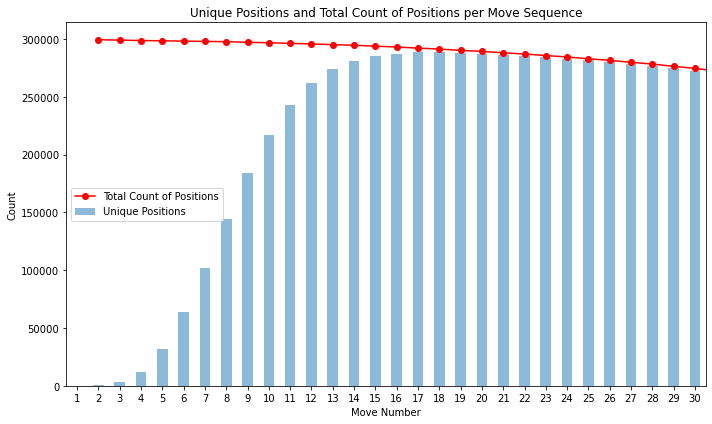

In [35]:
import matplotlib.pyplot as plt

# Count unique positions per move sequence
unique_positions_per_move = processed_games_df.groupby('move_number')['position'].nunique()

# Get the total count of positions per move
total_positions_per_move = processed_games_df.groupby('move_number').size()

# Plot the data
plt.figure(figsize=(10, 6))

# Bar plot for unique positions
unique_positions_per_move.plot(kind='bar', alpha=0.5, label='Unique Positions')

# Line plot for total count of positions
total_positions_per_move.plot(kind='line', color='red', marker='o', label='Total Count of Positions')

plt.title('Unique Positions and Total Count of Positions per Move Sequence')
plt.xlabel('Move Number')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels readable
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 864x432 with 0 Axes>

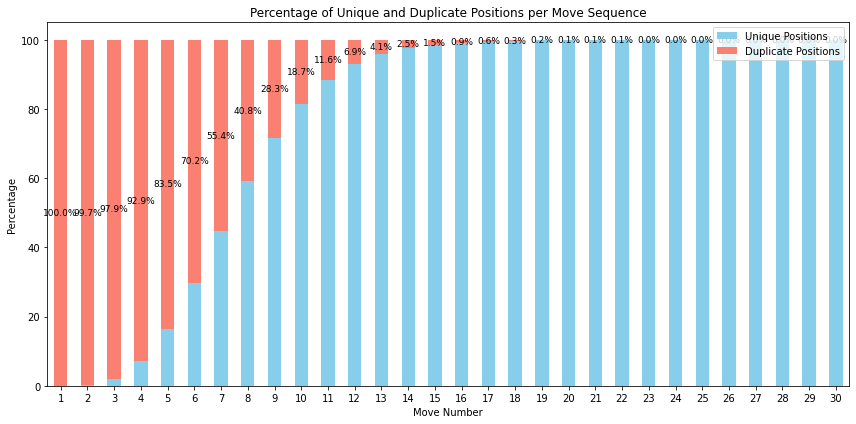

In [36]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
ax = percentage_df.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 6))
plt.title('Percentage of Unique and Duplicate Positions per Move Sequence')
plt.xlabel('Move Number')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Keep the x-axis labels readable
plt.legend(loc='upper right')

# Annotate bars with the percentage of duplicate positions
for i, rect in enumerate(ax.patches[len(ax.patches)//2:]):  # Iterate over the duplicate position bars
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, 
            rect.get_y() + height / 2.0, 
            f'{percentage_duplicates.iloc[i]:.1f}%', 
            ha='center', 
            va='center', 
            color='black',
            fontsize=9)

plt.tight_layout()
plt.show()


In [38]:
processed_games_df.to_csv('../../testData/splitted_games/processed_games_moves.csv', index=False)
